<h1 style='text-align: center;'>TP2</h1>
<h1 style='text-align: center;'>Réseau Neuronal Convolutif en utilisant TensorFlow </h1>

### L'objectif de ce TP est de créer un exemple classique de classification des chiffres en utilisant un réseau de convolution, en exploitant la célèbre bibliothèque TensorFlow.

## les différentes bibliothèques utilisées.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import UpSampling2D, Dropout, Dense,Flatten
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

## Lire la base de données MNIST et la séparer en jeux de données d'entraînement et de test.

In [3]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print('Nombre des exemples pour l\'apprentissage :', len(x_train))
print('Nombre des exemples pour le test :', len(x_train))
print('Image dimension :', x_train[0].shape)

Nombre des exemples pour l'apprentissage : 60000
Nombre des exemples pour le test : 60000
Image dimension : (28, 28)


## Normalisation des données

In [5]:
x_train = x_train/255
x_test = x_test/255

## Visualisation de quelques images de la base de données

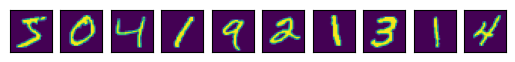

In [6]:
for i in range(10):
      ax = plt.subplot(1, 10, i+1)
      plt.imshow(x_train[i])
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
plt.show()

## Redimensionnement
## Transformer le tableau en une dimension


In [7]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

# Générateurs d'images
## Augmentation des images



In [ ]:
datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=20,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images

# Création du Modèle de convolution



In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=10, activation='softmax'))

# Récapitulatif de l'architecture modèle

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

# Sélection de l'optimiser pour la decente de gradient

In [18]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.0001), metrics=["accuracy"])

In [19]:
y_train  = pd.get_dummies(y_train).values
y_test  = pd.get_dummies(y_test).values

# Entrainement du modèle et évaluation

In [25]:
# Démarrage de l'entrainement du réseau
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                           steps_per_epoch=1000,             # nombre image entrainement / batch_size
                           epochs=25,                        # nombre de boucle à réaliser sur le jeu de données complet
                           verbose=1,                        # verbosité
                           validation_data=(  x_test, y_test))   # données de validation (X(données) et y(labels)

Epoch 1/25


<ipython-input-25-8374ae2874f0>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),


1000/1000 [==============================] - 32s 18ms/step - loss: 0.3911 - accuracy: 0.8856 - val_loss: 0.0478 - val_accuracy: 0.9860
Epoch 2/25
1000/1000 [==============================] - 18s 18ms/step - loss: 0.1571 - accuracy: 0.9560 - val_loss: 0.0553 - val_accuracy: 0.9835
Epoch 3/25
1000/1000 [==============================] - 19s 19ms/step - loss: 0.1392 - accuracy: 0.9617 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 4/25
1000/1000 [==============================] - 19s 19ms/step - loss: 0.1281 - accuracy: 0.9662 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 5/25
1000/1000 [==============================] - 21s 21ms/step - loss: 0.1143 - accuracy: 0.9695 - val_loss: 0.0530 - val_accuracy: 0.9860
Epoch 6/25
1000/1000 [==============================] - 25s 25ms/step - loss: 0.1050 - accuracy: 0.9727 - val_loss: 0.0374 - val_accuracy: 0.9891
Epoch 7/25
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0970 - accuracy: 0.9743 - val_loss: 0.0263 - val_accura

# Évaluation du modèle

In [26]:
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0231, final accuracy: 0.9932


# Affichage des courbes d'apprentissages

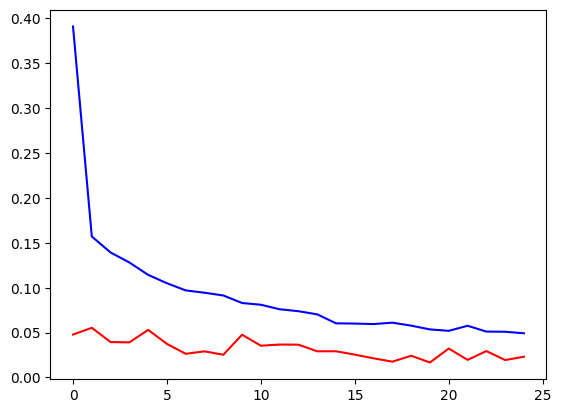

In [27]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()


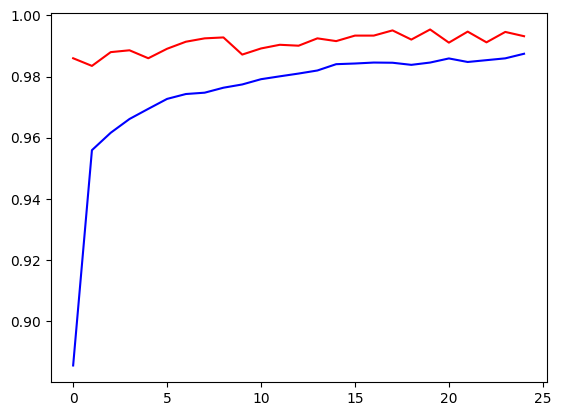

In [28]:
plt.plot(hist.history['accuracy'], color='b')
plt.plot(hist.history['val_accuracy'], color='r')
plt.show()

# Prédictions sur le jeu de test

In [29]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [30]:
y_predicted_max = np.argmax(y_predicted,axis=1)
y_test_max = np.argmax(y_test,axis=1)

## Affichage du Matrice de confusion

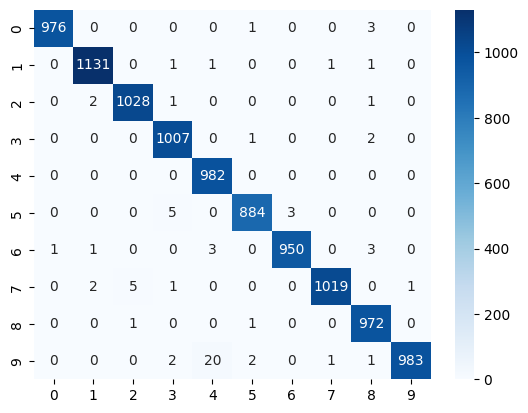

In [31]:
cm = confusion_matrix(y_test_max,y_predicted_max)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()